In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import yaml

In [11]:
with open('../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

---

<h3 style="text-align: center;">Разбираемся с пропусками</h3>

---

In [12]:
df =  pd.read_csv('../data/cian_data_r_1_c_SPB.csv',index_col=0)
df

,id,time_post,time_parse,link,city,floor,floors_count,rooms_count,total_meters,price_per_m2,...,Высота потолков,Планировка,Санузел,Балкон/лоджия,Вид из окон,Ремонт,Год постройки,Тип дома,Аварийность,Парковка
0,295698515.0,28/11/2023 01:51,29/11/2023 02:43,https://spb.cian.ru/rent/flat/295698515/,Санкт-Петербург,25,25,1,39.0,897,...,2.7,NaN,1.0,1 лоджия,На улицу и двор,Косметический,2017.0,Панельный,Нет,Наземная
1,295698178.0,28/11/2023 01:40,04/12/2023 17:55,https://spb.cian.ru/rent/flat/295698178/,Санкт-Петербург,2,5,1,35.0,542,...,2.5,NaN,1.0,1 балкон,На улицу,Косметический,1979.0,Панельный,Нет,Наземная
2,295697184.0,28/11/2023 01:09,04/12/2023 11:04,https://spb.cian.ru/rent/flat/295697184/,Санкт-Петербург,9,9,1,32.4,617,...,2.6,NaN,1.0,NaN,NaN,Косметический,1981.0,Панельный,Нет,NaN
3,295695893.0,28/11/2023 00:46,28/11/2023 02:43,https://spb.cian.ru/rent/flat/295695893/,Санкт-Петербург,9,9,1,39.0,1282,...,2.6,NaN,1.0,NaN,NaN,Дизайнерский,2022.0,Монолитный,Нет,NaN
4,295695736.0,28/11/2023 00:38,04/12/2023 02:49,https://spb.cian.ru/rent/flat/295695736/,Санкт-Петербург,4,5,1,32.0,937,...,2.5,NaN,1.0,1 балкон,Во двор,Косметический,1962.0,Панельный,Нет,Наземная
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,298459885.0,03/03/2024 20:03,03/03/2024 22:28,https://spb.cian.ru/rent/flat/298459885/,Санкт-Петербург,2,5,1,30.0,1133,...,NaN,NaN,1.0,NaN,Во двор,Косметический,1964.0,Кирпичный,Нет,Наземная
3925,298409563.0,03/03/2024 19:20,03/03/2024 22:29,https://spb.cian.ru/rent/flat/298409563/,Санкт-Петербург,7,8,1,39.5,936,...,2.7,NaN,1.0,1 лоджия,На улицу,Евроремонт,2016.0,NaN,Нет,Подземная
3926,298335968.0,02/03/2024 15:14,03/03/2024 22:30,https://spb.cian.ru/rent/flat/298335968/,Санкт-Петербург,3,24,1,34.0,1470,...,2.9,NaN,1.0,1 лоджия,На улицу,Дизайнерский,2021.0,NaN,Нет,Подземная
3927,298335818.0,02/03/2024 15:12,03/03/2024 22:31,https://spb.cian.ru/rent/flat/298335818/,Санкт-Петербург,7,14,1,41.0,1390,...,NaN,NaN,1.0,1 лоджия,Во двор,Евроремонт,2022.0,NaN,Нет,Подземная


In [13]:
df_utils = df[['Холодильник','Стиральная машина','Телевизор','Ванна','Мебель на кухне','Посудомоечная машина','Кондиционер','Интернет','Душевая кабина','Мебель в комнатах']]

In [14]:
df_utils_ = df_utils.replace(0,np.NaN)

In [15]:
df_utils_c = df_utils_.count().to_frame().reset_index()
df_utils_c.rename(columns={'index':'Удобства',0:'Количество'},inplace=True)
df_utils_c

,Удобства,Количество
0,Холодильник,3620
1,Стиральная машина,3597
2,Телевизор,2344
3,Ванна,2358
4,Мебель на кухне,3295
5,Посудомоечная машина,1033
6,Кондиционер,315
7,Интернет,2732
8,Душевая кабина,595
9,Мебель в комнатах,3337


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


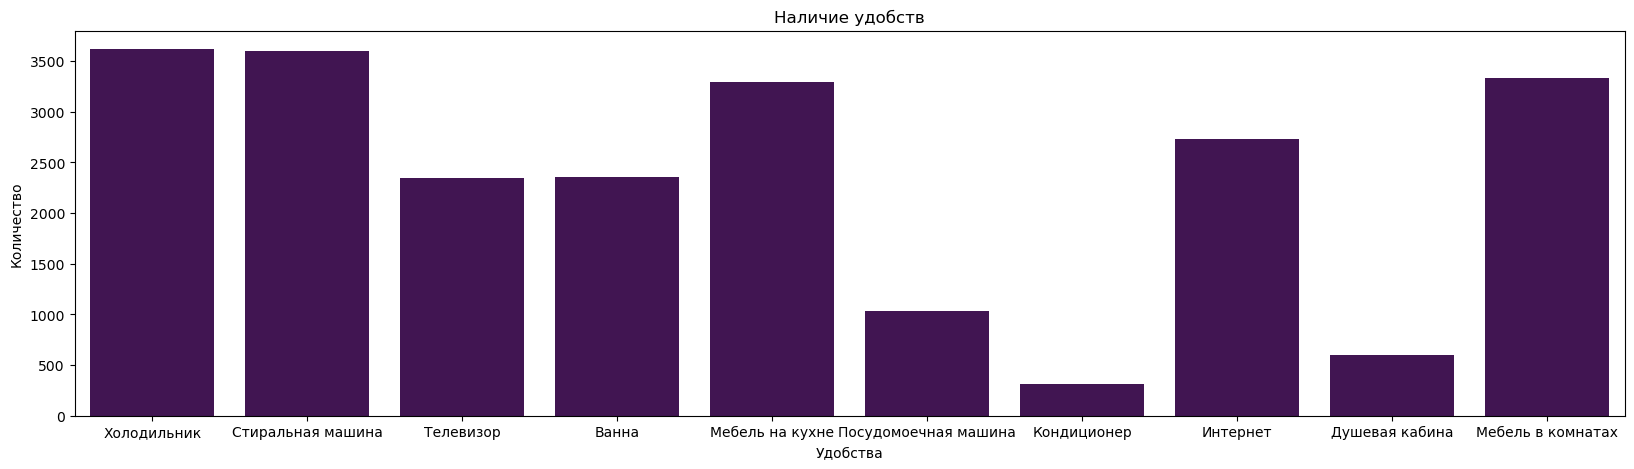

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(data =df_utils_c,x='Удобства',y='Количество',color= (69/255, 11/255, 92/255))
plt.title('Наличие удобств')
plt.show()

In [17]:
df.loc[(df['Ванна'] == 0) & (df['Душевая кабина'] ==0),'link'].tail(30)

3824    https://spb.cian.ru/rent/flat/299136277/
3826    https://spb.cian.ru/rent/flat/299135621/
3828    https://spb.cian.ru/rent/flat/299134470/
3831    https://spb.cian.ru/rent/flat/299132500/
3832    https://spb.cian.ru/rent/flat/299132493/
3839    https://spb.cian.ru/rent/flat/299128799/
3841    https://spb.cian.ru/rent/flat/299126432/
3843    https://spb.cian.ru/rent/flat/299126141/
3844    https://spb.cian.ru/rent/flat/299125485/
3845    https://spb.cian.ru/rent/flat/299125483/
3846    https://spb.cian.ru/rent/flat/299125482/
3864    https://spb.cian.ru/rent/flat/299094602/
3865    https://spb.cian.ru/rent/flat/299090503/
3866    https://spb.cian.ru/rent/flat/299087628/
3877    https://spb.cian.ru/rent/flat/298994479/
3879    https://spb.cian.ru/rent/flat/298987907/
3881    https://spb.cian.ru/rent/flat/298973964/
3884    https://spb.cian.ru/rent/flat/298948744/
3888    https://spb.cian.ru/rent/flat/298924415/
3890    https://spb.cian.ru/rent/flat/298914647/
3891    https://spb.

'Ванна' и 'Душевая кабина' как правило не о чем не говрят, люди просто забывают их проставлять, поэтому удалим эти 2 столбца из данных

'Мебель на кухне' и 'Мебель в комнатах' тоже имеют мало общего с реальность, поэтому их тоже убираем

Однако, если убрать эти параметры невозможно определить квартиры без ремонта становится сильно сложнее, поэтому уберем их из анализа впринципе, удалив все квартиры в которых все удобства равны 0, и те в которых арендадатель честно поставил 'Без ремонта'

In [18]:
df_2 = df.drop(df[(df['Ванна'] == 0) & (df['Душевая кабина'] ==0) & (df['Холодильник'] ==0) & (df['Стиральная машина'] ==0) & (df['Телевизор'] ==0) & (df['Мебель на кухне'] ==0) & (df['Посудомоечная машина'] ==0) & (df['Кондиционер'] ==0) & (df['Интернет'] ==0) & (df['Мебель в комнатах'] ==0)].index)

In [19]:
len(df[(df['Ванна'] == 0) & (df['Душевая кабина'] ==0) & (df['Холодильник'] ==0) & (df['Стиральная машина'] ==0) & (df['Телевизор'] ==0) & (df['Мебель на кухне'] ==0) & (df['Посудомоечная машина'] ==0) & (df['Кондиционер'] ==0) & (df['Интернет'] ==0) & (df['Мебель в комнатах'] ==0)])

148

In [20]:
df_2.reset_index(drop=True,inplace=True)

Разбираемся с ремонтом

In [21]:
df_2['Ремонт'].value_counts()

Ремонт
Евроремонт       1787
Косметический    1316
Дизайнерский      598
Без ремонта        25
Name: count, dtype: int64

In [22]:
df_2 = df_2.drop(df_2[df_2['Ремонт']== 'Без ремонта'].index)

Удалим планировку, так как этот параметр не имеет смысла для однакомнатных квартир

In [23]:
df_2 = df_2.drop('Планировка', axis = 1)

In [24]:
len_clear_old = len(df_2.dropna())

Так как аварийных домов в данных нет, но есть пустые значения, то удалим этот столбец

In [31]:
df_2['Аварийность'].value_counts()

Аварийность
Нет    3566
Name: count, dtype: int64

In [30]:
df_2.drop(df_2[df_2['Аварийность']=='Да'].index,inplace=True)

In [32]:
df_2 = df_2.drop('Аварийность',axis = 1)

Удаляем стобцы про ванну и мебель(объяснял зачем выше)

In [33]:
df_2 = df_2.drop(['Душевая кабина','Мебель в комнатах','Мебель на кухне','Ванна'], axis=1)

Удаляем квартиры без данных о адресе, так как он понадабится потом для взвешанной регрессии

In [34]:
df_2 = df_2.drop(df_2[df_2['house_number'].isnull()].index)
df_2 = df_2.drop(df_2[df_2['street'].isnull()].index)

Удаляем квартиры в которые не записалась инфа об удобствах по какой-то причине

In [35]:
df_2= df_2.drop(df_2[df_2['Холодильник'].isnull()].index)

Заполняем пустые поля 'метро'

In [36]:
df_2['underground']=df_2['underground'].fillna('нет метро')

In [37]:
df_2['Балкон/лоджия'].value_counts()

Балкон/лоджия
1 лоджия              1621
1 балкон              1099
1 лоджия, 1 балкон      57
2 лоджии                18
2 балкона                6
Name: count, dtype: int64

In [38]:
df_2.loc[df_2['Балкон/лоджия'].isnull(),'link'].tail(20)

3690    https://spb.cian.ru/rent/flat/299131651/
3691    https://spb.cian.ru/rent/flat/299131643/
3704    https://spb.cian.ru/rent/flat/299121495/
3706    https://spb.cian.ru/rent/flat/299120789/
3709    https://spb.cian.ru/rent/flat/299115314/
3719    https://spb.cian.ru/rent/flat/299090503/
3720    https://spb.cian.ru/rent/flat/299087628/
3723    https://spb.cian.ru/rent/flat/299070355/
3724    https://spb.cian.ru/rent/flat/299068784/
3738    https://spb.cian.ru/rent/flat/298948744/
3740    https://spb.cian.ru/rent/flat/298928838/
3751    https://spb.cian.ru/rent/flat/298817636/
3754    https://spb.cian.ru/rent/flat/298754285/
3756    https://spb.cian.ru/rent/flat/298744625/
3757    https://spb.cian.ru/rent/flat/298739806/
3760    https://spb.cian.ru/rent/flat/298731610/
3765    https://spb.cian.ru/rent/flat/298672640/
3770    https://spb.cian.ru/rent/flat/298616725/
3775    https://spb.cian.ru/rent/flat/298532458/
3777    https://spb.cian.ru/rent/flat/298459885/
Name: link, dtype: o

Если инфы о балконе нет - значит балкона нет. Заполним пустые строки

In [39]:
df_2['Балкон/лоджия']=df_2['Балкон/лоджия'].fillna('нет балкона')

Посмотрим на высоту потолков

In [40]:
df_2['Высота потолков'].value_counts()

Высота потолков
2.7    914
2.5    473
2.6    472
2.8    289
3.0    145
0.0     27
3.2     26
2.9     23
3.3     11
3.1     11
3.4      7
3.5      6
2.4      6
4.0      4
2.0      3
3.6      3
4.2      2
3.8      2
2.2      2
1.5      1
4.1      1
5.0      1
2.3      1
Name: count, dtype: int64

Удалим выбросы и заменим пустые значения средним

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


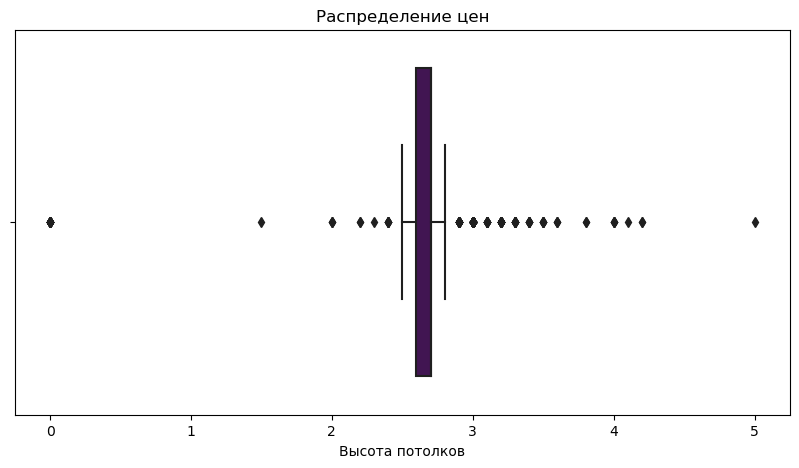

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Высота потолков',color= (69/255, 11/255, 92/255),data = df_2)
plt.title('Распределение цен')
plt.show()

In [43]:
df_2 = df_2.drop(df_2[np.abs(stats.zscore(df_2['Высота потолков'],nan_policy='omit'))>3].index)
df_2 = df_2.drop(df_2[np.abs(stats.zscore(df_2['Высота потолков'],nan_policy='omit'))>3].index)

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


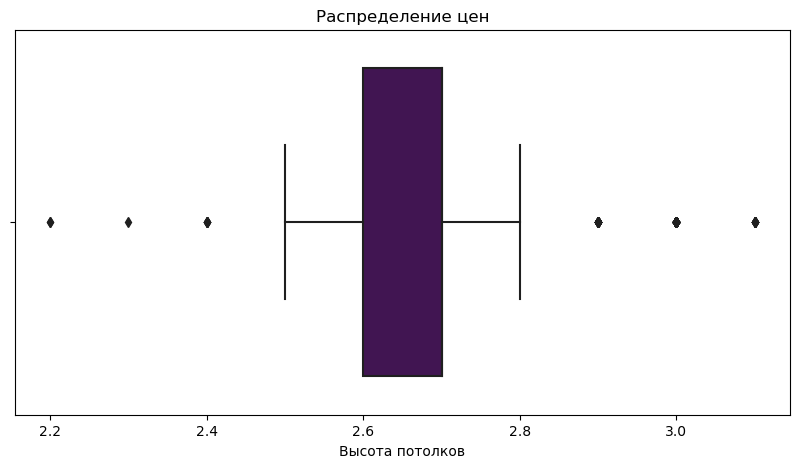

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Высота потолков',color= (69/255, 11/255, 92/255),data = df_2)
plt.title('Распределение цен')
plt.show()

In [45]:
df_2['Высота потолков'].count(), len(df_2)

(2336, 3642)

In [46]:
cellig_mean = df_2['Высота потолков'].mean()
cellig_mean

2.67277397260274

In [47]:
df_2['Высота потолков'] = df_2['Высота потолков'].fillna(cellig_mean)

Разбираемся с площадью

In [48]:
print('С жил. площадью: {}'.format(df_2['Жилая площадь'].count()))
print('С площадью кухни: {}'.format(df_2['Площадь кухни'].count()))
print('Всего: {}'.format(len(df_2)))

С жил. площадью: 2972
С площадью кухни: 3176
Всего: 3642


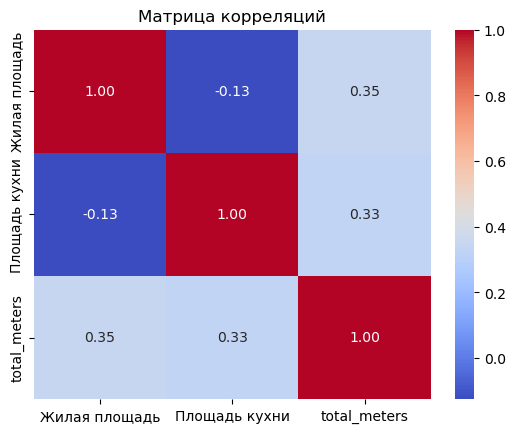

In [49]:
df_area = df_2[['Жилая площадь','Площадь кухни','total_meters']]
df_area = df_area.dropna()
area_corr = df_area.corr()
sns.heatmap(area_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

Вообще корреляции не большие, поэтому не то чтобы хорошо удалять жилплощадь, но пока данных мало, чтобы еще сильнее не уменьшать их количство за счет удаления квартир, где жилплощадь не указана, я считаю, что следует удалить

In [50]:
df_2 = df_2.drop('Жилая площадь',axis = 1)

Разбираемся с парковкой

In [51]:
df_2['Парковка'].value_counts()

Парковка
Наземная          1475
Подземная          400
Открытая           399
Многоуровневая     118
На крыше             1
Name: count, dtype: int64

Удалим объявление с парковкой на крыше, так как оно одно

In [52]:
df_2.drop(df_2[df_2['Парковка']=='На крыше'].index,inplace=True)

In [53]:
df_2.loc[df_2['Парковка'] =='Наземная','link'].tail(5)

3758    https://spb.cian.ru/rent/flat/298734824/
3760    https://spb.cian.ru/rent/flat/298731610/
3768    https://spb.cian.ru/rent/flat/298645597/
3776    https://spb.cian.ru/rent/flat/298517506/
3777    https://spb.cian.ru/rent/flat/298459885/
Name: link, dtype: object

In [54]:
df_2.loc[df_2['Парковка'].isnull(),'link'].tail(5)

3767    https://spb.cian.ru/rent/flat/298649078/
3769    https://spb.cian.ru/rent/flat/298639869/
3770    https://spb.cian.ru/rent/flat/298616725/
3771    https://spb.cian.ru/rent/flat/298574976/
3772    https://spb.cian.ru/rent/flat/298573128/
Name: link, dtype: object

Заполним пустые значения 'наземной' парковкой, конечно это не будет идельно отражать ситуацию, так как в некоторых домах в центре парковочных места почти нет, но во многих домах со значением 'наземная' места не всегда больше.

In [55]:
df_2['Парковка']=df_2['Парковка'].fillna('Наземная')

Разберемся с санузлами

In [56]:
df_2.loc[df_2['Санузел'].isna(),'link']

5       https://spb.cian.ru/rent/flat/295693511/
8       https://spb.cian.ru/rent/flat/295692227/
10      https://spb.cian.ru/rent/flat/295691410/
19      https://spb.cian.ru/rent/flat/295688083/
20      https://spb.cian.ru/rent/flat/295688081/
                          ...                   
3719    https://spb.cian.ru/rent/flat/299090503/
3720    https://spb.cian.ru/rent/flat/299087628/
3741    https://spb.cian.ru/rent/flat/298928728/
3757    https://spb.cian.ru/rent/flat/298739806/
3767    https://spb.cian.ru/rent/flat/298649078/
Name: link, Length: 360, dtype: object

In [57]:
df_2['Санузел'].value_counts()

Санузел
1.0    3253
2.0      28
Name: count, dtype: int64

Так как мы рассматриваем квартиры, а не команты, то квартира без санузла это что-то на грани фантастики, а 2 санузла - явное приемущство, так что предположим, что арендадатели действуют рационально и пишут об этом приемуществе, и заполним все пустые значения единичками

In [58]:
df_2['Санузел']=df_2['Санузел'].fillna(1.0)

In [59]:
df_2.count().sort_values()

Тип дома                2852
Вид из окон             2911
Площадь кухни           3175
Год постройки           3467
Ремонт                  3599
id                      3641
Балкон/лоджия           3641
Санузел                 3641
Высота потолков         3641
Интернет                3641
Кондиционер             3641
Посудомоечная машина    3641
Телевизор               3641
Стиральная машина       3641
Холодильник             3641
underground             3641
street                  3641
district                3641
price_per_month         3641
price_per_m2            3641
total_meters            3641
rooms_count             3641
floors_count            3641
floor                   3641
city                    3641
link                    3641
time_parse              3641
time_post               3641
house_number            3641
Парковка                3641
dtype: int64

In [60]:
len_clear_old

801

In [61]:
len(df_2.dropna())

1910

Итого удалось увеличть число отчищенных данных более чем в 2 раза

In [62]:
df_2.columns

Index(['id', 'time_post', 'time_parse', 'link', 'city', 'floor',
       'floors_count', 'rooms_count', 'total_meters', 'price_per_m2',
       'price_per_month', 'district', 'street', 'house_number', 'underground',
       'Холодильник', 'Стиральная машина', 'Телевизор', 'Посудомоечная машина',
       'Кондиционер', 'Интернет', 'Площадь кухни', 'Высота потолков',
       'Санузел', 'Балкон/лоджия', 'Вид из окон', 'Ремонт', 'Год постройки',
       'Тип дома', 'Парковка'],
      dtype='object')

удалим все ненужные колонки

In [63]:
df_2 = df_2.dropna()

In [50]:
# ds = df_2.drop(['link','city','price_per_m2','street','house_number','rooms_count'], axis = 1)

---

<h3 style="text-align: center;">Смотрим на данные</h3>

---

In [64]:
ds = df_2.drop(['link','city','price_per_m2','rooms_count'], axis = 1)

In [65]:
ds.reset_index(drop = True, inplace = True)

In [66]:
ds['adress'] = ds.apply(lambda x: str(x.street) +' ' + str(x.house_number) + ' Санкт-Петербург', axis=1)

In [67]:
ds = ds.drop(['street','house_number'],axis = 1)

In [68]:
from datetime import datetime

In [69]:
ds = ds.drop(ds[ds['time_post'] == '1 дек  18:21'].index)
ds = ds.drop(ds[ds['time_post'] == '1 дек  13:53'].index)
ds = ds.drop(ds[ds['time_post'] == '1 дек  14:54'].index)
ds = ds.drop(ds[ds['time_post'] == '1 дек  13:20'].index)
ds = ds.drop(ds[ds['time_post'] == '1 дек  00:14'].index)
ds = ds.drop(ds[ds['time_post'] == '1 дек  10:36'].index)

In [70]:
ds['time_parse'] = ds['time_parse'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M'))
ds['time_post'] = ds['time_post'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M'))

In [71]:
ds['time_parse'][2]

Timestamp('2023-12-04 02:49:00')

Выберем только актуальные данные, когда обнавление нормально работало

In [72]:
ds = ds[ds['time_parse'] > datetime(year=2024, month=2,day=1)]
ds.reset_index(drop=True,inplace=True)
ds

,id,time_post,time_parse,floor,floors_count,total_meters,price_per_month,district,underground,Холодильник,...,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,Вид из окон,Ремонт,Год постройки,Тип дома,Парковка,adress
0,298765026.0,2024-02-20 10:52:00,2024-02-26 18:00:00,3,6,38.00,30000,Невский,Ломоносовская,1.0,...,7.6,2.500000,1.0,"1 лоджия, 1 балкон",На улицу и двор,Косметический,1961.0,Блочный,Наземная,Бабушкина 101к1 Санкт-Петербург
1,298762151.0,2024-02-20 01:33:00,2024-02-26 18:00:00,3,5,34.00,18000,Калининский,Академическая,1.0,...,8.0,2.500000,1.0,1 лоджия,Во двор,Косметический,1966.0,Блочный,Наземная,Верности 28К3 Санкт-Петербург
2,298759135.0,2024-02-19 23:21:00,2024-02-22 13:00:00,4,10,45.00,60000,Василеостровский,Приморская,1.0,...,8.0,2.600000,1.0,1 лоджия,На улицу,Дизайнерский,1974.0,Кирпичный,Наземная,Кораблестроителей 22К1 Санкт-Петербург
3,298758825.0,2024-02-19 23:14:00,2024-02-21 01:08:00,8,23,47.00,45000,Невский,Пролетарская,1.0,...,19.0,2.700000,1.0,1 лоджия,На улицу,Дизайнерский,2014.0,Монолитный,Многоуровневая,проспект Обуховской обороны 110К1 Санкт-Петербург
4,298758800.0,2024-02-20 21:01:00,2024-02-21 01:09:00,7,15,35.00,37000,Приморский,Беговая,1.0,...,8.0,2.700000,1.0,1 балкон,На улицу,Евроремонт,2015.0,Монолитный,Подземная,Мебельная 19К2 Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,298667665.0,2024-03-01 09:13:00,2024-03-03 22:19:00,15,19,40.50,38500,Невский,Улица Дыбенко,1.0,...,10.0,2.800000,1.0,1 балкон,Во двор,Евроремонт,2021.0,Панельный,Подземная,Дыбенко 2 Санкт-Петербург
969,298645597.0,2024-03-03 16:32:00,2024-03-03 22:21:00,2,5,32.00,30000,Московский,Звездная,1.0,...,10.0,2.800000,1.0,1 балкон,На улицу,Евроремонт,2021.0,Монолитный,Наземная,Орбитальная 7к1 Санкт-Петербург
970,298573128.0,2024-03-02 18:23:00,2024-03-03 22:24:00,9,12,34.49,32700,Приморский,Комендантский проспект,1.0,...,10.0,2.600000,1.0,1 лоджия,Во двор,Евроремонт,2022.0,Монолитный,Наземная,Планерная 97к1 Санкт-Петербург
971,298517506.0,2024-03-02 12:30:00,2024-03-03 22:28:00,7,22,42.00,22000,Красногвардейский,Гражданский проспект,1.0,...,11.0,2.672774,1.0,1 лоджия,Во двор,Косметический,2020.0,Панельный,Наземная,аллея Евгения Шварца 5 Санкт-Петербург


In [73]:
def time_diff(post,parse):
    time_to_rent = parse - post
    time_to_rent = round(time_to_rent.total_seconds()/60/60/24)
    return time_to_rent

In [74]:
ds['time_to_rent'] = ds.apply(lambda x: time_diff(x.time_post,x.time_parse), axis = 1)

In [75]:
ds = ds.drop(['time_post','time_parse'],axis = 1)

In [76]:
ds = ds.drop(ds[ds['district']=='Однушка в Приморском е1-комн. квартира'].index)

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


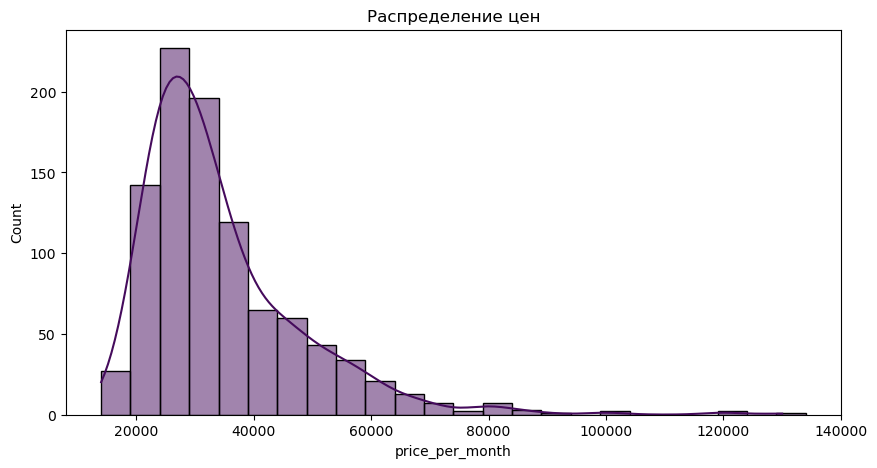

In [77]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'price_per_month',color= (69/255, 11/255, 92/255),data = ds,binwidth=5000,kde=True)
plt.title('Распределение цен')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


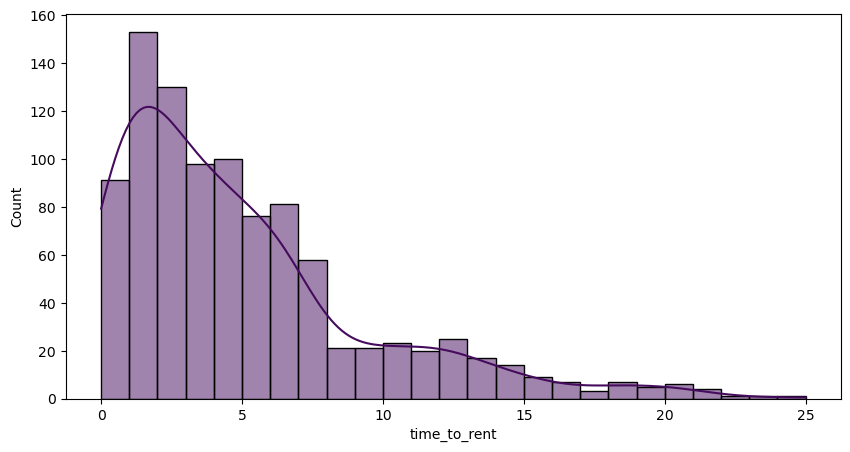

In [82]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'time_to_rent',color= (69/255, 11/255, 92/255),data = ds,binwidth=1,kde = True)
plt.title('Распределение времени на сдачу')
plt.show()

удалим выбросы через 3-сигмы

In [83]:
ds = ds.drop(ds[np.abs(stats.zscore(ds['price_per_month']))>3].index)
ds = ds.drop(ds[np.abs(stats.zscore(ds['time_to_rent']))>3].index)

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


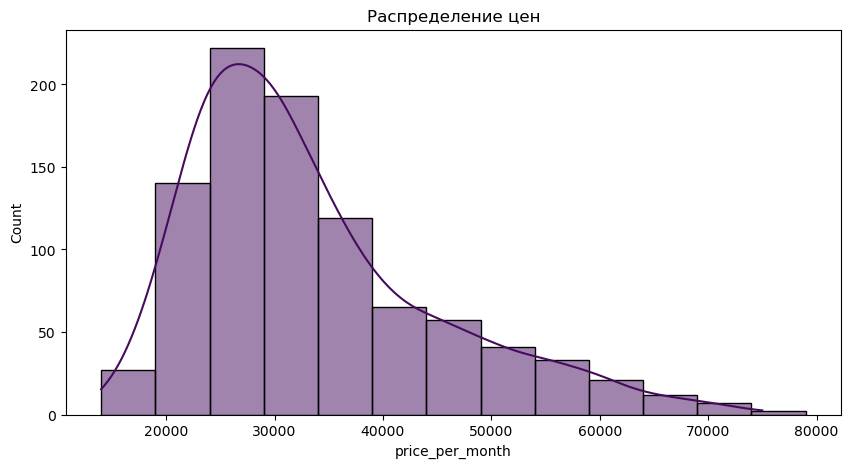

In [84]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'price_per_month',color= (69/255, 11/255, 92/255),data = ds,binwidth=5000,kde=True)
plt.title('Распределение цен')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


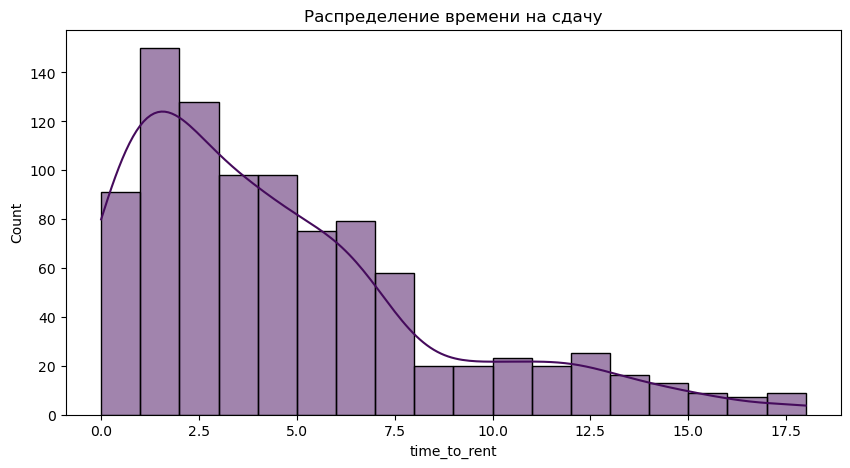

In [85]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'time_to_rent',color= (69/255, 11/255, 92/255),data = ds,binwidth=1,kde = True)
plt.title('Распределение времени на сдачу')
plt.show()

In [ ]:
# ds = ds.drop(ds[np.abs(stats.zscore(ds['price_per_month']))>3].index)
# ds = ds.drop(ds[np.abs(stats.zscore(ds['time_to_rent']))>3].index)

In [ ]:
# plt.figure(figsize=(10,5))
# sns.histplot(x = 'price_per_month',color= (69/255, 11/255, 92/255),data = ds,binwidth=5000,kde=True)
# plt.title('Распределение цен')
# plt.show()

In [ ]:
# plt.figure(figsize=(10,5))
# sns.histplot(x = 'time_to_rent',color= (69/255, 11/255, 92/255),data = ds,binwidth=1,kde = True)
# plt.title('Распределение времени на сдачу')
# plt.show()

Ну пока данных мало - пойдет

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


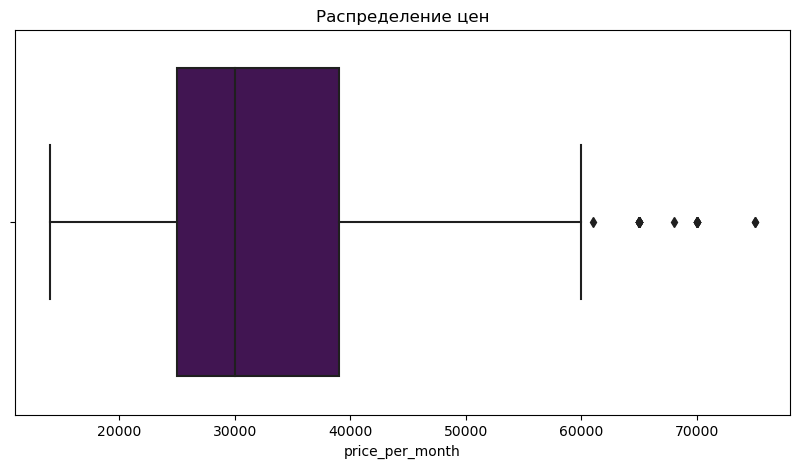

In [86]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'price_per_month',color= (69/255, 11/255, 92/255),data = ds)
plt.title('Распределение цен')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


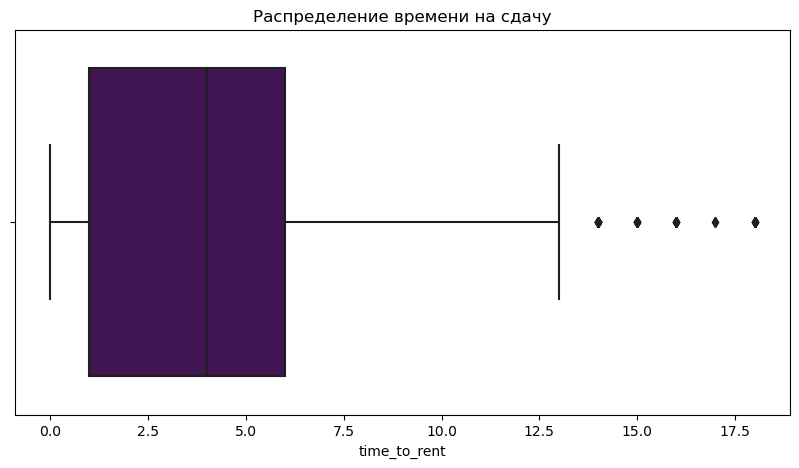

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'time_to_rent',color= (69/255, 11/255, 92/255),data = ds)
plt.title('Распределение времени на сдачу')
plt.show()

Посмотрим на метро и районы

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


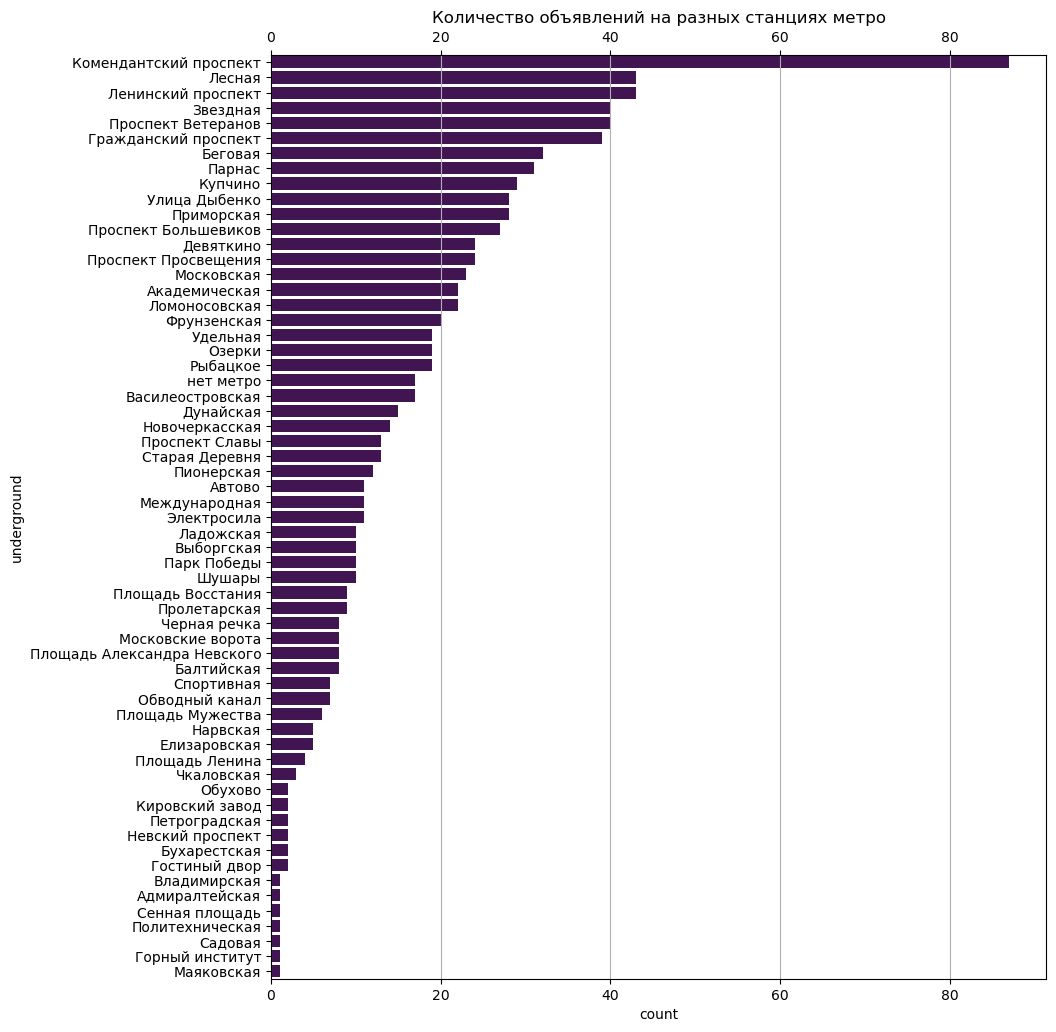

In [88]:
plt.figure(figsize=(10,12))
sns.countplot(y = 'underground',color= (69/255, 11/255, 92/255),data = ds,order = ds['underground'].value_counts().index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Количество объявлений на разных станциях метро')
plt.show()

In [89]:
und = ds['underground'].value_counts() < 5
und_to_del = list(und[und == True].index)
und_to_del

['Площадь Ленина',
 'Чкаловская',
 'Обухово',
 'Кировский завод',
 'Петроградская',
 'Невский проспект',
 'Бухарестская',
 'Гостиный двор',
 'Владимирская',
 'Адмиралтейская',
 'Сенная площадь',
 'Политехническая',
 'Садовая',
 'Горный институт',
 'Маяковская']

In [90]:
ds = ds.drop(ds[ds['underground'].isin(und_to_del)].index)

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


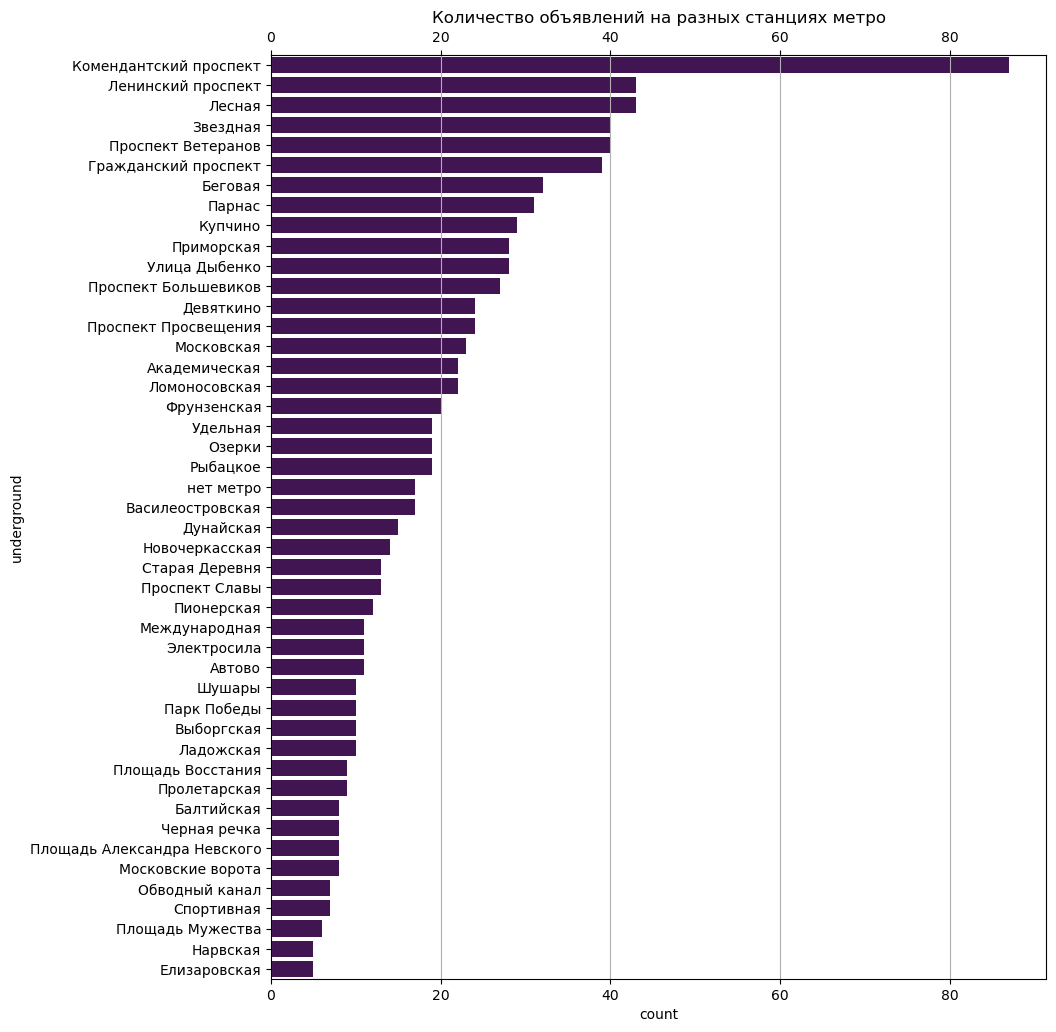

In [91]:
plt.figure(figsize=(10,12))
sns.countplot(y = 'underground',color= (69/255, 11/255, 92/255),data = ds,order = ds['underground'].value_counts().index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Количество объявлений на разных станциях метро')
plt.show()

In [92]:
metro_grouped = ds.groupby('underground').agg({'price_per_month':'mean','time_to_rent':'mean'})
metro_grouped.index.name = None
metro_grouped

,price_per_month,time_to_rent
Автово,23818.181818,3.818182
Академическая,25727.272727,3.363636
Балтийская,45375.000000,7.375000
Беговая,31429.375000,4.687500
Василеостровская,51647.058824,3.764706
Выборгская,30900.000000,3.800000
Гражданский проспект,27269.230769,3.538462
Девяткино,22787.500000,3.875000
Дунайская,35200.000000,5.266667
Елизаровская,27000.000000,3.200000


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


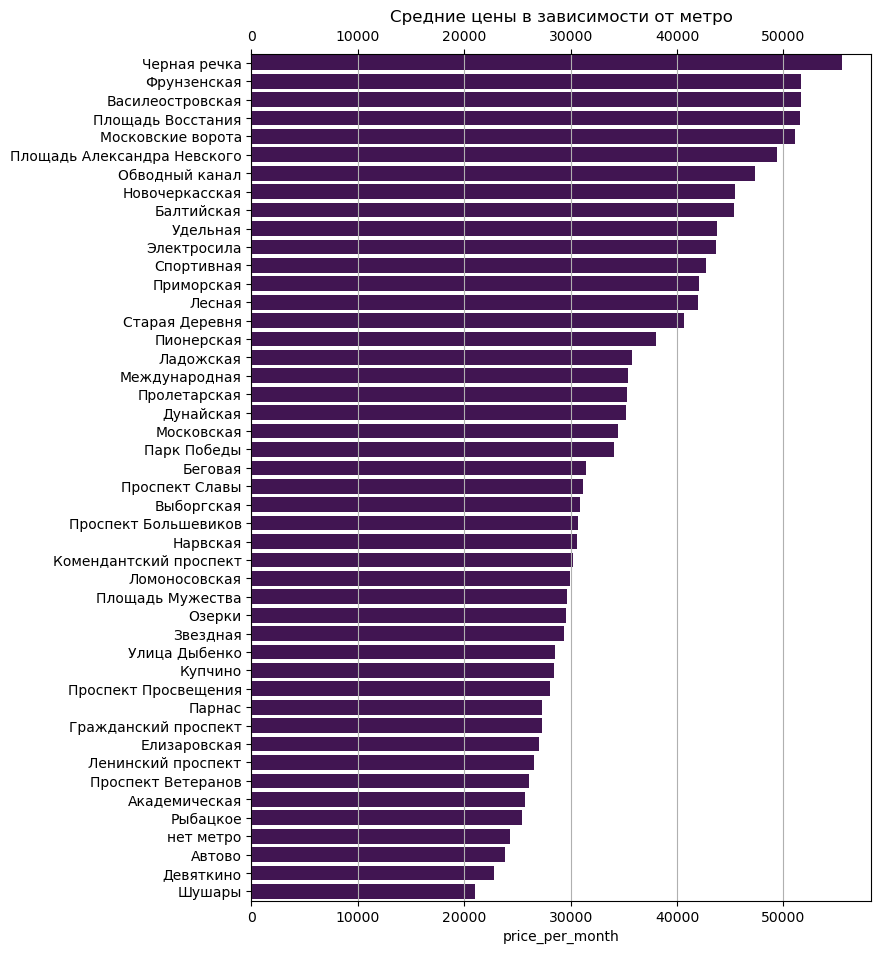

In [93]:
plt.figure(figsize=(8,11))
sns.barplot(data = metro_grouped,x = 'price_per_month', y =metro_grouped.index ,color= (69/255, 11/255, 92/255), order = metro_grouped.sort_values(by='price_per_month',ascending=False).index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Средние цены в зависимости от метро')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


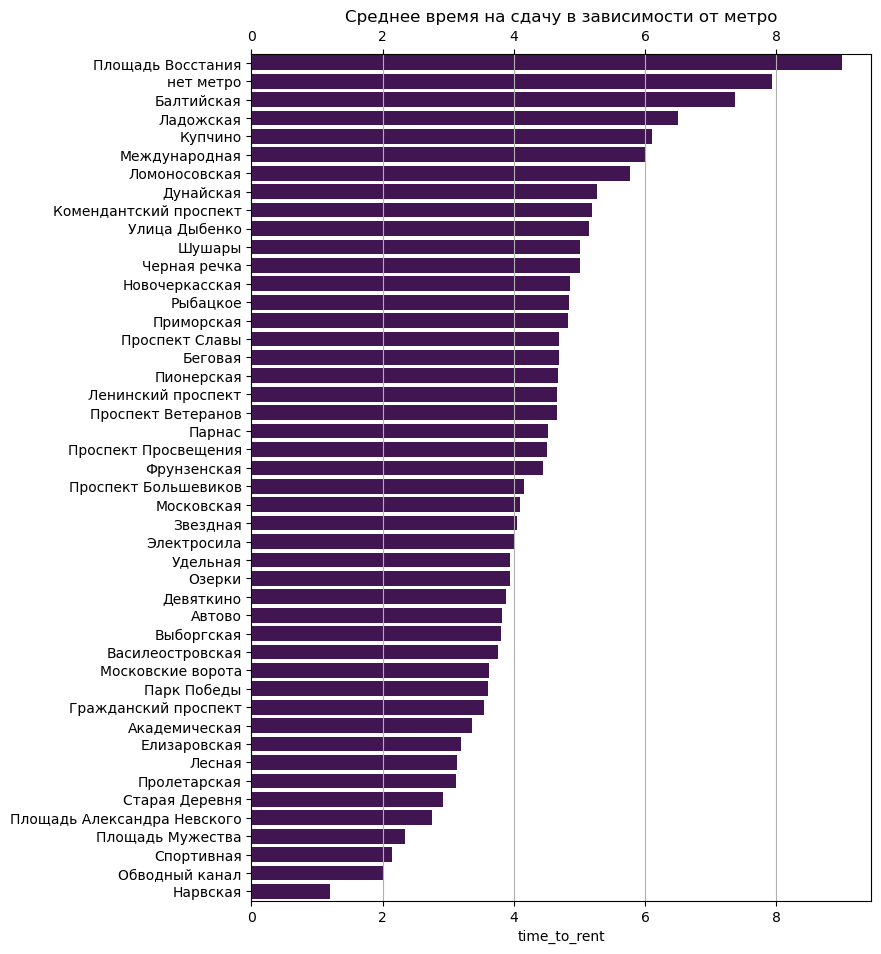

In [94]:
plt.figure(figsize=(8,11))
sns.barplot(data = metro_grouped,x = 'time_to_rent', y =metro_grouped.index ,color= (69/255, 11/255, 92/255),order = metro_grouped.sort_values(by='time_to_rent',ascending=False).index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Среднее время на сдачу в зависимости от метро')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


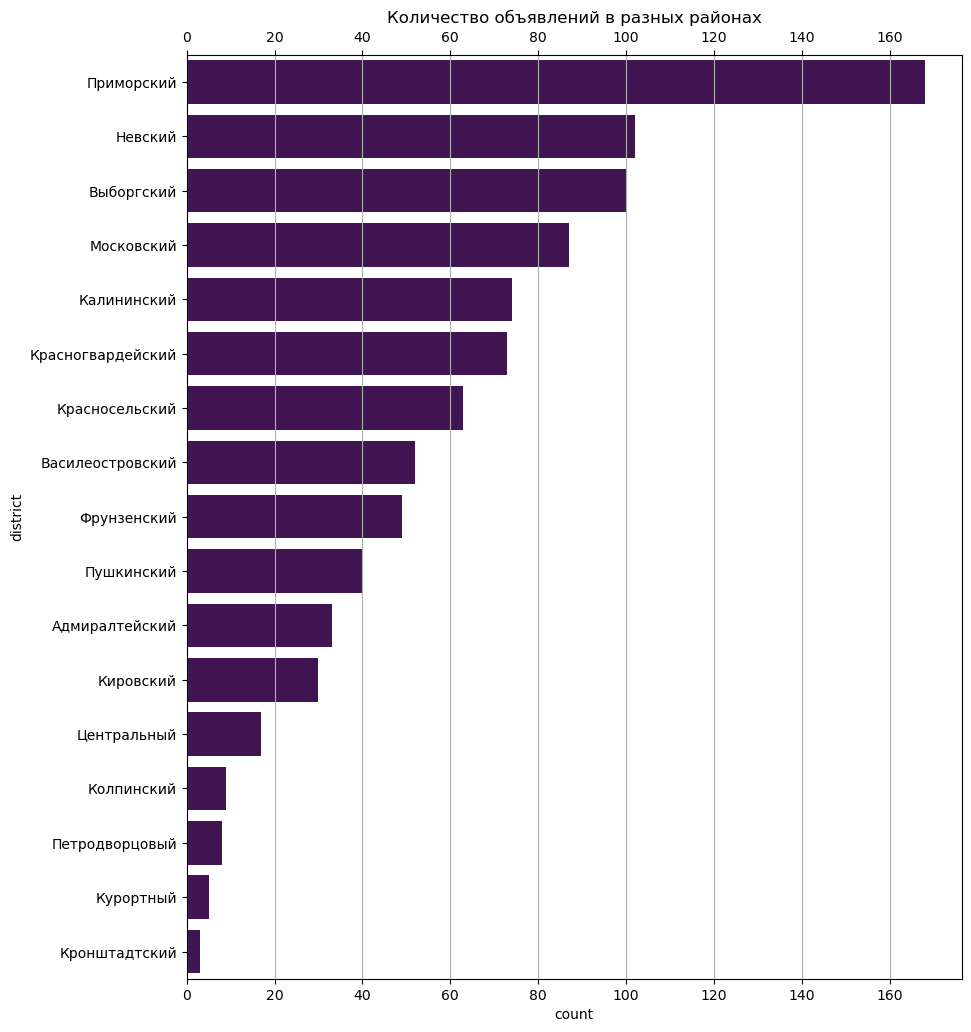

In [95]:
plt.figure(figsize=(10,12))
sns.countplot(y = 'district',color= (69/255, 11/255, 92/255),data = ds,order = ds['district'].value_counts().index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Количество объявлений в разных районах')
plt.show()

In [96]:
district_grouped = ds.groupby('district').agg({'price_per_month':'mean','time_to_rent':'mean'})
district_grouped.index.name = None
district_grouped

,price_per_month,time_to_rent
Адмиралтейский,48515.151515,4.757576
Василеостровский,45259.596154,4.115385
Выборгский,34218.900000,4.090000
Калининский,28955.405405,3.108108
Кировский,26133.333333,3.333333
Колпинский,21444.444444,4.444444
Красногвардейский,29815.068493,4.493151
Красносельский,26344.444444,5.079365
Кронштадтский,24666.666667,8.000000
Курортный,30400.000000,8.800000


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


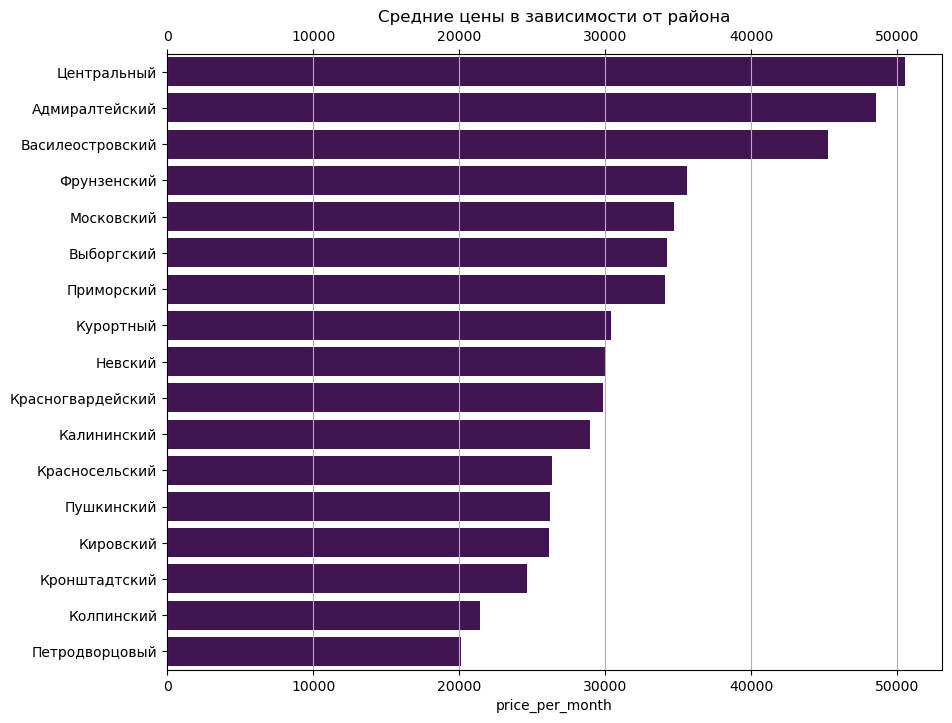

In [97]:
plt.figure(figsize=(10,8))
sns.barplot(data = district_grouped,x = 'price_per_month', y =district_grouped.index ,color= (69/255, 11/255, 92/255), order = district_grouped.sort_values(by='price_per_month',ascending=False).index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Средние цены в зависимости от района')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


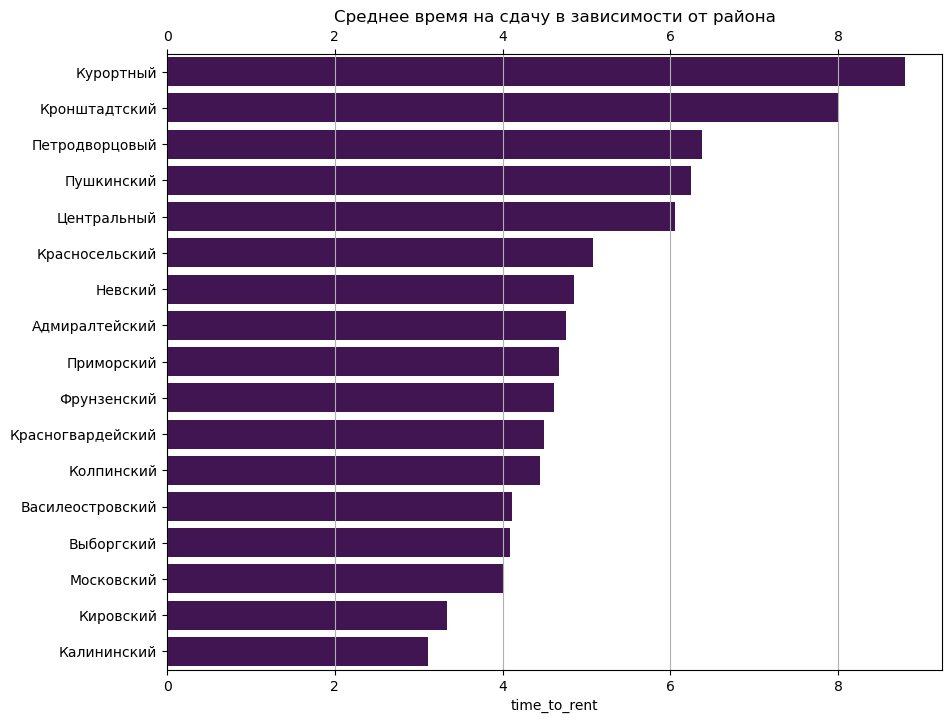

In [98]:
plt.figure(figsize=(10,8))
sns.barplot(data = district_grouped,x = 'time_to_rent', y =district_grouped.index ,color= (69/255, 11/255, 92/255), order = district_grouped.sort_values(by='time_to_rent',ascending=False).index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Среднее время на сдачу в зависимости от района')
plt.show()

---

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


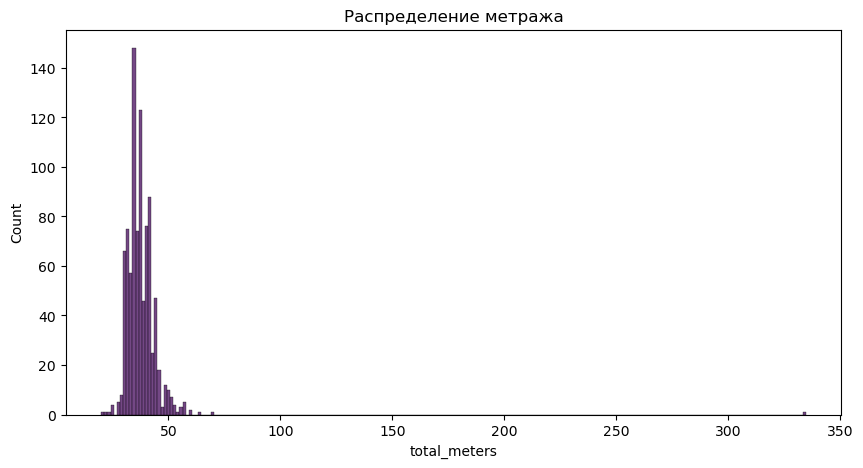

In [99]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'total_meters',color= (69/255, 11/255, 92/255),data = ds)
plt.title('Распределение метража')
plt.show()

In [100]:
ds = ds.drop(ds[np.abs(stats.zscore(ds['total_meters']))>3].index)

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


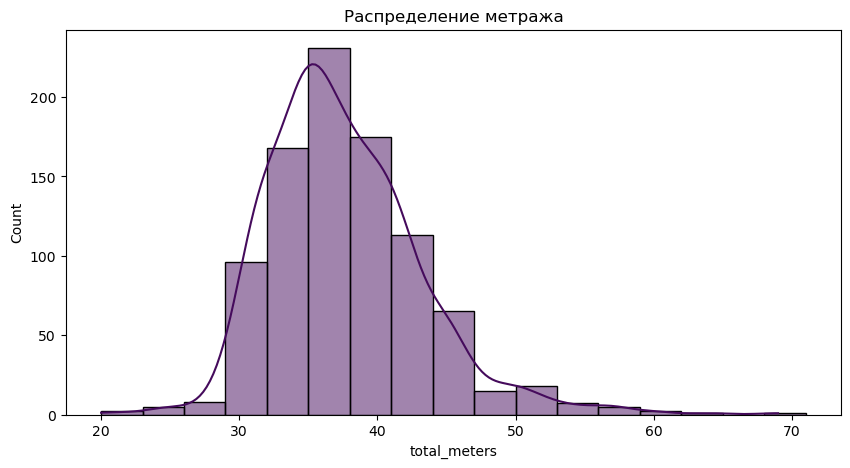

In [101]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'total_meters',color= (69/255, 11/255, 92/255),data = ds,binwidth=3,kde=True)
plt.title('Распределение метража')
plt.show()

---

In [102]:
ds.columns

Index(['id', 'floor', 'floors_count', 'total_meters', 'price_per_month',
       'district', 'underground', 'Холодильник', 'Стиральная машина',
       'Телевизор', 'Посудомоечная машина', 'Кондиционер', 'Интернет',
       'Площадь кухни', 'Высота потолков', 'Санузел', 'Балкон/лоджия',
       'Вид из окон', 'Ремонт', 'Год постройки', 'Тип дома', 'Парковка',
       'adress', 'time_to_rent'],
      dtype='object')

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

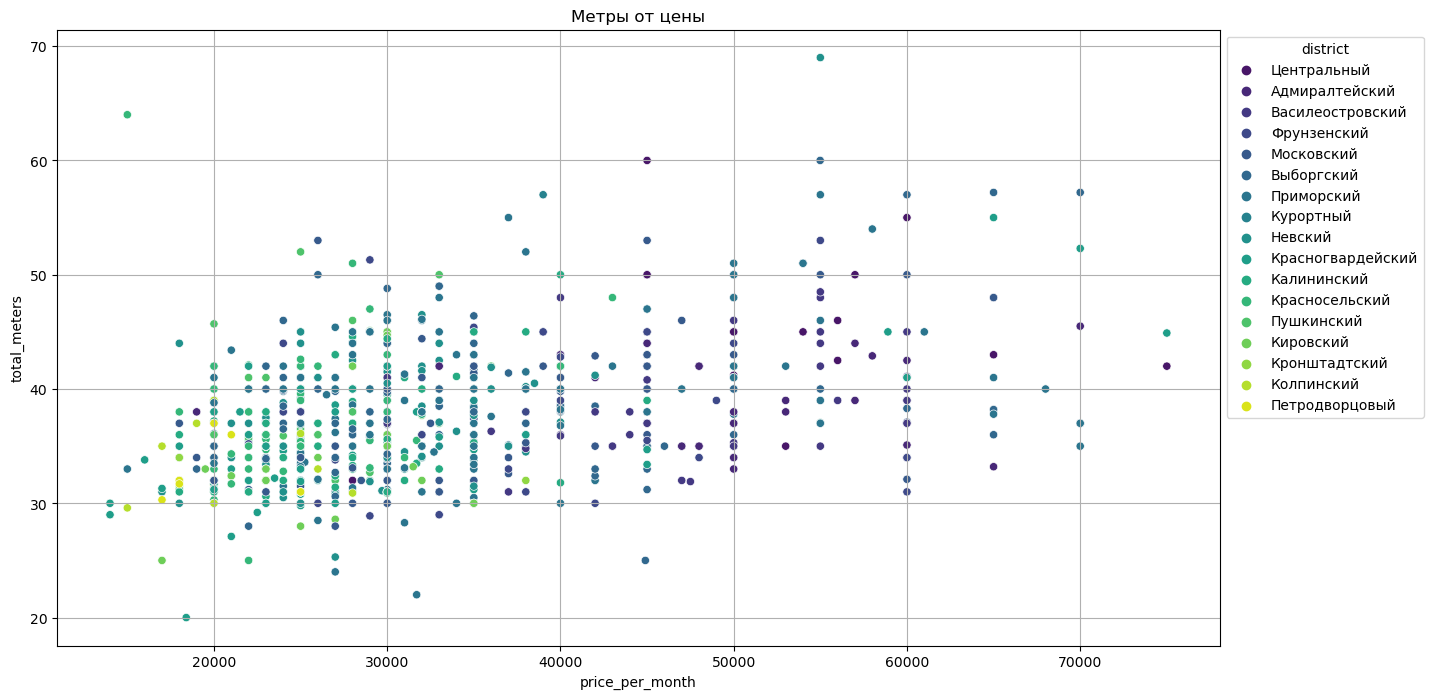

In [103]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data = ds,x = 'price_per_month', y ='total_meters',palette='viridis',hue = 'district',hue_order = district_grouped.sort_values(by='price_per_month',ascending=False).index)
sns.move_legend(ax,'upper left',bbox_to_anchor=(1, 1))
plt.grid()
plt.title('Метры от цены')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


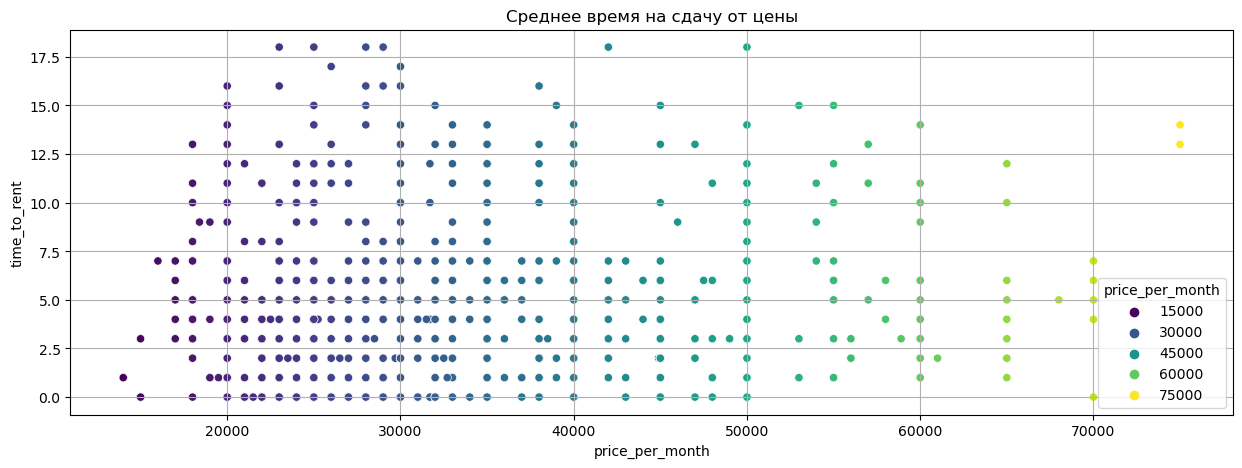

In [104]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = ds,x = 'price_per_month', y ='time_to_rent' , palette='viridis',hue = 'price_per_month')
plt.grid()
plt.title('Среднее время на сдачу от цены')
plt.show()

---

<h3 style="text-align: center;">Получаем координаты станций метро</h3>

---

In [ ]:
# ds = pd.read_csv('r_1_SPB_clear_w_time_to_m.csv', index_col=0)

In [ ]:
# ds = ds.drop(['time_to_metro','m_lat','m_long'],axis= 1)

In [105]:
import geopy

In [106]:
geolocator = geopy.geocoders.Yandex(config['YA_KEY'])

In [107]:
metros = list(ds['underground'].unique())
metros.remove('нет метро')
metros_ = ['метро ' + metro + ' Санкт-Петербург' for metro in metros]
metros_

['метро Ломоносовская Санкт-Петербург',
 'метро Академическая Санкт-Петербург',
 'метро Приморская Санкт-Петербург',
 'метро Пролетарская Санкт-Петербург',
 'метро Беговая Санкт-Петербург',
 'метро Шушары Санкт-Петербург',
 'метро Звездная Санкт-Петербург',
 'метро Проспект Просвещения Санкт-Петербург',
 'метро Фрунзенская Санкт-Петербург',
 'метро Электросила Санкт-Петербург',
 'метро Улица Дыбенко Санкт-Петербург',
 'метро Выборгская Санкт-Петербург',
 'метро Лесная Санкт-Петербург',
 'метро Комендантский проспект Санкт-Петербург',
 'метро Ладожская Санкт-Петербург',
 'метро Обводный канал Санкт-Петербург',
 'метро Международная Санкт-Петербург',
 'метро Московские ворота Санкт-Петербург',
 'метро Василеостровская Санкт-Петербург',
 'метро Автово Санкт-Петербург',
 'метро Новочеркасская Санкт-Петербург',
 'метро Пионерская Санкт-Петербург',
 'метро Парнас Санкт-Петербург',
 'метро Гражданский проспект Санкт-Петербург',
 'метро Площадь Восстания Санкт-Петербург',
 'метро Рыбацкое Санк

In [108]:
m_lat = []
m_long = []
for i in range(len(metros_)):
    loc = geolocator.geocode(metros_[i])
    m_lat.append(loc.latitude)
    m_long.append(loc.longitude)

In [109]:
metro_latlong = pd.DataFrame({'underground':metros,'m_lat':m_lat,'m_long':m_long})
# metro_latlong['underground'] = metro_latlong['underground'].apply(lambda x: x[6:])

In [110]:
metro_latlong

,underground,m_lat,m_long
0,Ломоносовская,59.877335,30.441695
1,Академическая,60.012719,30.396133
2,Приморская,59.948460,30.234607
3,Пролетарская,59.865122,30.470324
4,Беговая,59.988005,30.202609
5,Шушары,59.820042,30.432865
6,Звездная,59.833280,30.349447
7,Проспект Просвещения,60.051176,30.332676
8,Фрунзенская,59.906179,30.317530
9,Электросила,59.879164,30.318707


In [111]:
metro_latlong.to_csv('../data/metro_latlong.csv')

In [112]:
ds_m = ds.merge(metro_latlong, on='underground',how='left')

In [113]:
ds_m

,id,floor,floors_count,total_meters,price_per_month,district,underground,Холодильник,Стиральная машина,Телевизор,...,Балкон/лоджия,Вид из окон,Ремонт,Год постройки,Тип дома,Парковка,adress,time_to_rent,m_lat,m_long
0,298765026.0,3,6,38.00,30000,Невский,Ломоносовская,1.0,1.0,1.0,...,"1 лоджия, 1 балкон",На улицу и двор,Косметический,1961.0,Блочный,Наземная,Бабушкина 101к1 Санкт-Петербург,6,59.877335,30.441695
1,298762151.0,3,5,34.00,18000,Калининский,Академическая,1.0,1.0,0.0,...,1 лоджия,Во двор,Косметический,1966.0,Блочный,Наземная,Верности 28К3 Санкт-Петербург,7,60.012719,30.396133
2,298759135.0,4,10,45.00,60000,Василеостровский,Приморская,1.0,1.0,1.0,...,1 лоджия,На улицу,Дизайнерский,1974.0,Кирпичный,Наземная,Кораблестроителей 22К1 Санкт-Петербург,3,59.948460,30.234607
3,298758825.0,8,23,47.00,45000,Невский,Пролетарская,1.0,1.0,1.0,...,1 лоджия,На улицу,Дизайнерский,2014.0,Монолитный,Многоуровневая,проспект Обуховской обороны 110К1 Санкт-Петербург,1,59.865122,30.470324
4,298758800.0,7,15,35.00,37000,Приморский,Беговая,1.0,1.0,1.0,...,1 балкон,На улицу,Евроремонт,2015.0,Монолитный,Подземная,Мебельная 19К2 Санкт-Петербург,0,59.988005,30.202609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,298667665.0,15,19,40.50,38500,Невский,Улица Дыбенко,1.0,1.0,1.0,...,1 балкон,Во двор,Евроремонт,2021.0,Панельный,Подземная,Дыбенко 2 Санкт-Петербург,3,59.907437,30.483368
908,298645597.0,2,5,32.00,30000,Московский,Звездная,1.0,1.0,1.0,...,1 балкон,На улицу,Евроремонт,2021.0,Монолитный,Наземная,Орбитальная 7к1 Санкт-Петербург,0,59.833280,30.349447
909,298573128.0,9,12,34.49,32700,Приморский,Комендантский проспект,1.0,1.0,0.0,...,1 лоджия,Во двор,Евроремонт,2022.0,Монолитный,Наземная,Планерная 97к1 Санкт-Петербург,1,60.008716,30.258385
910,298517506.0,7,22,42.00,22000,Красногвардейский,Гражданский проспект,1.0,1.0,1.0,...,1 лоджия,Во двор,Косметический,2020.0,Панельный,Наземная,аллея Евгения Шварца 5 Санкт-Петербург,1,60.034829,30.418195


In [114]:
len(ds),len(ds_m)

(912, 912)

In [115]:
ds_m = ds_m.drop(ds_m[ds_m['underground'] =='нет метро'].index)
ds_m.reset_index(drop = True,inplace= True)

---

<h3 style="text-align: center;">Получаем координаты домов</h3>

---

In [121]:
adresses = ds_m['adress']
a_lat = []
a_long = []
for i in range(len(adresses)):
    loc = geolocator.geocode(adresses[i])
    a_lat.append(loc.latitude)
    a_long.append(loc.longitude)

In [125]:
len(a_lat),len(ds_m)

(895, 895)

In [126]:
ds_m['a_lat'] = a_lat
ds_m['a_long'] = a_long

In [127]:
ds_m

,id,floor,floors_count,total_meters,price_per_month,district,underground,Холодильник,Стиральная машина,Телевизор,...,Ремонт,Год постройки,Тип дома,Парковка,adress,time_to_rent,m_lat,m_long,a_lat,a_long
0,298765026.0,3,6,38.00,30000,Невский,Ломоносовская,1.0,1.0,1.0,...,Косметический,1961.0,Блочный,Наземная,Бабушкина 101к1 Санкт-Петербург,6,59.877335,30.441695,59.868379,30.450409
1,298762151.0,3,5,34.00,18000,Калининский,Академическая,1.0,1.0,0.0,...,Косметический,1966.0,Блочный,Наземная,Верности 28К3 Санкт-Петербург,7,60.012719,30.396133,60.005369,30.415482
2,298759135.0,4,10,45.00,60000,Василеостровский,Приморская,1.0,1.0,1.0,...,Дизайнерский,1974.0,Кирпичный,Наземная,Кораблестроителей 22К1 Санкт-Петербург,3,59.948460,30.234607,59.945148,30.212867
3,298758825.0,8,23,47.00,45000,Невский,Пролетарская,1.0,1.0,1.0,...,Дизайнерский,2014.0,Монолитный,Многоуровневая,проспект Обуховской обороны 110К1 Санкт-Петербург,1,59.865122,30.470324,59.866671,30.468600
4,298758800.0,7,15,35.00,37000,Приморский,Беговая,1.0,1.0,1.0,...,Евроремонт,2015.0,Монолитный,Подземная,Мебельная 19К2 Санкт-Петербург,0,59.988005,30.202609,59.996245,30.217278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,298667665.0,15,19,40.50,38500,Невский,Улица Дыбенко,1.0,1.0,1.0,...,Евроремонт,2021.0,Панельный,Подземная,Дыбенко 2 Санкт-Петербург,3,59.907437,30.483368,59.899211,30.447022
891,298645597.0,2,5,32.00,30000,Московский,Звездная,1.0,1.0,1.0,...,Евроремонт,2021.0,Монолитный,Наземная,Орбитальная 7к1 Санкт-Петербург,0,59.833280,30.349447,59.761010,30.316838
892,298573128.0,9,12,34.49,32700,Приморский,Комендантский проспект,1.0,1.0,0.0,...,Евроремонт,2022.0,Монолитный,Наземная,Планерная 97к1 Санкт-Петербург,1,60.008716,30.258385,60.033216,30.195970
893,298517506.0,7,22,42.00,22000,Красногвардейский,Гражданский проспект,1.0,1.0,1.0,...,Косметический,2020.0,Панельный,Наземная,аллея Евгения Шварца 5 Санкт-Петербург,1,60.034829,30.418195,60.032892,30.462204


In [128]:
ds_m.columns

Index(['id', 'floor', 'floors_count', 'total_meters', 'price_per_month',
       'district', 'underground', 'Холодильник', 'Стиральная машина',
       'Телевизор', 'Посудомоечная машина', 'Кондиционер', 'Интернет',
       'Площадь кухни', 'Высота потолков', 'Санузел', 'Балкон/лоджия',
       'Вид из окон', 'Ремонт', 'Год постройки', 'Тип дома', 'Парковка',
       'adress', 'time_to_rent', 'm_lat', 'm_long', 'a_lat', 'a_long'],
      dtype='object')

In [129]:
ds_m.to_csv('../data/r_1_SPB_clear_w_adress.csv')

---

<h3 style="text-align: center;">Считаем расстояние до метро</h3>

---

In [130]:
from graphh import GraphHopper
gh_client = GraphHopper(api_key=config['GH_KEY'])

In [131]:
import time

In [132]:
time_to_metro = []
for i in range(len(ds_m)):
    time_to_metro.append(gh_client.duration([(ds_m['a_lat'][i],ds_m['a_long'][i]),(ds_m['m_lat'][i],ds_m['m_long'][i])],vehicle='foot',unit= 'min'))
    time.sleep(2)

In [133]:
ds_m['time_to_metro'] = time_to_metro
ds_m

,id,floor,floors_count,total_meters,price_per_month,district,underground,Холодильник,Стиральная машина,Телевизор,...,Год постройки,Тип дома,Парковка,adress,time_to_rent,m_lat,m_long,a_lat,a_long,time_to_metro
0,298765026.0,3,6,38.00,30000,Невский,Ломоносовская,1.0,1.0,1.0,...,1961.0,Блочный,Наземная,Бабушкина 101к1 Санкт-Петербург,6,59.877335,30.441695,59.868379,30.450409,14.376183
1,298762151.0,3,5,34.00,18000,Калининский,Академическая,1.0,1.0,0.0,...,1966.0,Блочный,Наземная,Верности 28К3 Санкт-Петербург,7,60.012719,30.396133,60.005369,30.415482,18.741683
2,298759135.0,4,10,45.00,60000,Василеостровский,Приморская,1.0,1.0,1.0,...,1974.0,Кирпичный,Наземная,Кораблестроителей 22К1 Санкт-Петербург,3,59.948460,30.234607,59.945148,30.212867,21.986767
3,298758825.0,8,23,47.00,45000,Невский,Пролетарская,1.0,1.0,1.0,...,2014.0,Монолитный,Многоуровневая,проспект Обуховской обороны 110К1 Санкт-Петербург,1,59.865122,30.470324,59.866671,30.468600,4.160467
4,298758800.0,7,15,35.00,37000,Приморский,Беговая,1.0,1.0,1.0,...,2015.0,Монолитный,Подземная,Мебельная 19К2 Санкт-Петербург,0,59.988005,30.202609,59.996245,30.217278,20.925217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,298667665.0,15,19,40.50,38500,Невский,Улица Дыбенко,1.0,1.0,1.0,...,2021.0,Панельный,Подземная,Дыбенко 2 Санкт-Петербург,3,59.907437,30.483368,59.899211,30.447022,27.807950
891,298645597.0,2,5,32.00,30000,Московский,Звездная,1.0,1.0,1.0,...,2021.0,Монолитный,Наземная,Орбитальная 7к1 Санкт-Петербург,0,59.833280,30.349447,59.761010,30.316838,127.091583
892,298573128.0,9,12,34.49,32700,Приморский,Комендантский проспект,1.0,1.0,0.0,...,2022.0,Монолитный,Наземная,Планерная 97к1 Санкт-Петербург,1,60.008716,30.258385,60.033216,30.195970,61.620933
893,298517506.0,7,22,42.00,22000,Красногвардейский,Гражданский проспект,1.0,1.0,1.0,...,2020.0,Панельный,Наземная,аллея Евгения Шварца 5 Санкт-Петербург,1,60.034829,30.418195,60.032892,30.462204,46.553833


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


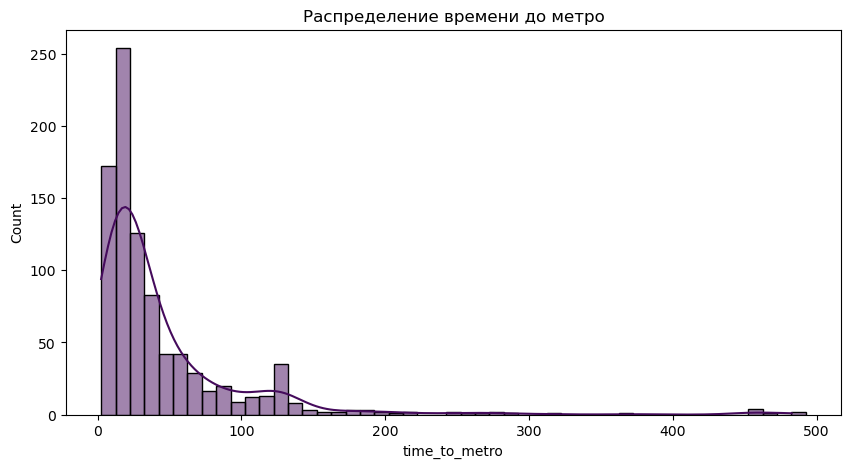

In [134]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'time_to_metro',color= (69/255, 11/255, 92/255),data = ds_m,binwidth=10,kde=True)
plt.title('Распределение времени до метро')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


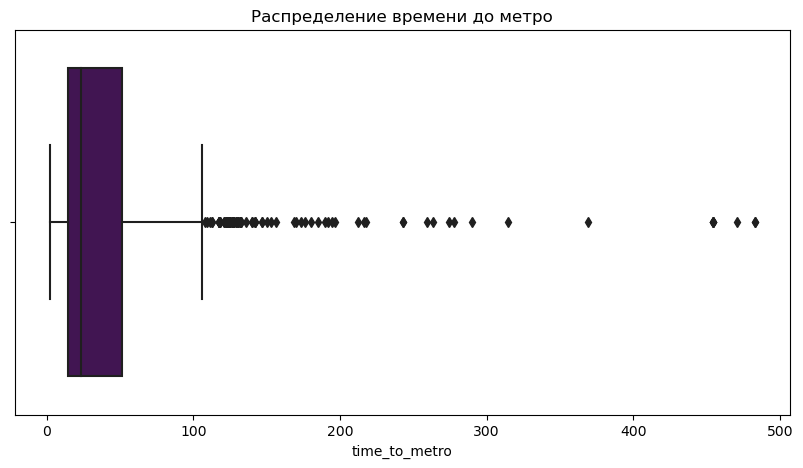

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'time_to_metro',color= (69/255, 11/255, 92/255),data = ds_m)
plt.title('Распределение времени до метро')
plt.show()

In [136]:
ds_m_clear = ds_m[ds_m['time_to_metro']<=120]

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


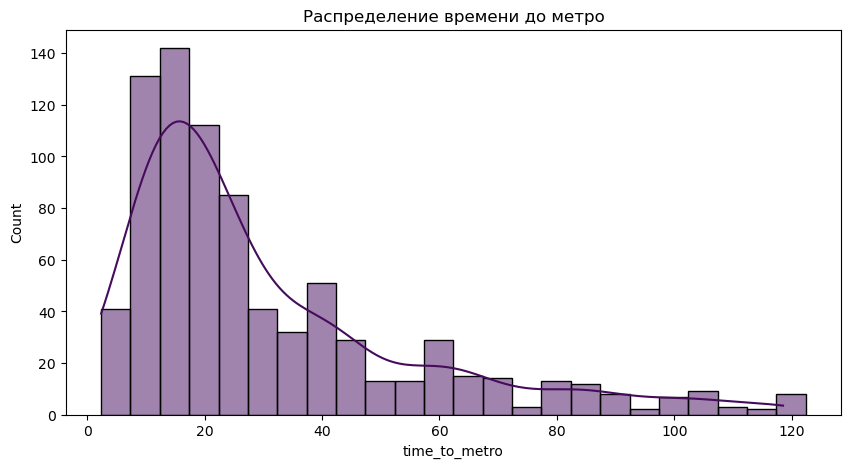

In [137]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'time_to_metro',color= (69/255, 11/255, 92/255),data = ds_m_clear,binwidth=5,kde=True)
plt.title('Распределение времени до метро')
plt.show()

In [138]:
ds_m_clear.to_csv('../data/r_1_SPB_clear_w_time_to_m.csv')

Очевидно, что анализ и построенние всех графиков нужно проводить после завершения очистки, это лишь предварительный, пока данные собираются